# Regularization
- Regularization in Machine Learning is a technique used to prevent overfitting by adding a penalty term to the model's loss function. This penalty discourages the model from becoming too complex and helps it generalize better to unseen data.

## Why Regularization?
- When a model learns too much from training data, including noise, it performs poorly on new data — this is called overfitting.

Regularization helps by:

- Keeping model weights smaller.

- Simplifying the model.

- Making it more robust and general.



# Types of Regularization
## 1. L1 Regularization (Lasso)
- Adds the absolute value of weights to the loss function.

- Encourages sparsity (some weights become exactly 0).

- Useful for feature selection.

- **Loss = MSE + λ × Σ|weights|**

## 2. L2 Regularization (Ridge)
- Adds the squared value of weights to the loss function.

- Encourages smaller, but non-zero weights.

- Keeps all features but with less influence.

- **Loss = MSE + λ × Σ(weights/m²)**

## 3. Elastic Net
- Combines both L1 and L2.

- Useful when there are many correlated features.



## Intuition
- Without regularization:
Model might memorize training data too well → High variance.

- With regularization:
Model learns general patterns → Better generalization.

# Ridge Regularization (L2 Regularization)
Ridge Regularization is a type of L2 regularization, and it's used to penalize large weights in a linear regression model.

# What Ridge Regularization Does:
It modifies the loss function by adding the sum of the squares of the weights, multiplied by a regularization parameter (λ):

Loss=MSE+𝜆∑𝑖=1𝑛𝑤𝑖2
Loss=MSE+λ i=1∑n(wi)^2
​
 
- MSE: Mean Squared Error (standard loss)

- λ: Regularization strength (larger λ → more penalty) range (0 to infinit) higher the value of lamda lower the slope line m.

- wᵢ: Model weights



In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
from sklearn.datasets import load_diabetes

data=load_diabetes()

In [3]:
print(data.DESCR)

.. _diabetes_dataset:

Diabetes dataset
----------------

Ten baseline variables, age, sex, body mass index, average blood
pressure, and six blood serum measurements were obtained for each of n =
442 diabetes patients, as well as the response of interest, a
quantitative measure of disease progression one year after baseline.

**Data Set Characteristics:**

:Number of Instances: 442

:Number of Attributes: First 10 columns are numeric predictive values

:Target: Column 11 is a quantitative measure of disease progression one year after baseline

:Attribute Information:
    - age     age in years
    - sex
    - bmi     body mass index
    - bp      average blood pressure
    - s1      tc, total serum cholesterol
    - s2      ldl, low-density lipoproteins
    - s3      hdl, high-density lipoproteins
    - s4      tch, total cholesterol / HDL
    - s5      ltg, possibly log of serum triglycerides level
    - s6      glu, blood sugar level

Note: Each of these 10 feature variables have bee

In [4]:
X=data.data
y=data.target

In [5]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2,random_state=45)

In [6]:
from sklearn.linear_model import LinearRegression
L=LinearRegression()

In [7]:
L.fit(X_train,y_train)

LinearRegression()

In [8]:
print(L.coef_)
print(L.intercept_)

[  23.45465406 -247.42747406  492.1087518   329.35876431 -970.79723039
  573.54295519  182.42162368  255.92168168  794.21609282   89.32249214]
152.13623331746496


In [9]:
y_pred=L.predict(X_test)

In [10]:
from sklearn.metrics import r2_score,mean_squared_error

print("R2 score",r2_score(y_test,y_pred))
print("RMSE",np.sqrt(mean_squared_error(y_test,y_pred)))

R2 score 0.5188113124539249
RMSE 48.72713760953253


In [11]:
from sklearn.linear_model import Ridge
R=Ridge(alpha=100000)

In [12]:
R.fit(X_train,y_train)

Ridge(alpha=100000)

In [13]:
print(R.coef_)
print(R.intercept_)

[ 0.00260126  0.00057066  0.00776597  0.0060976   0.00233864  0.00184724
 -0.00513942  0.0052716   0.00734598  0.00528629]
151.83287930791352


In [14]:
y_pred1=R.predict(X_test)
print("R2 score",r2_score(y_test,y_pred1))
print("RMSE",np.sqrt(mean_squared_error(y_test,y_pred1)))


R2 score -0.00042490200441935855
RMSE 70.25956272917782


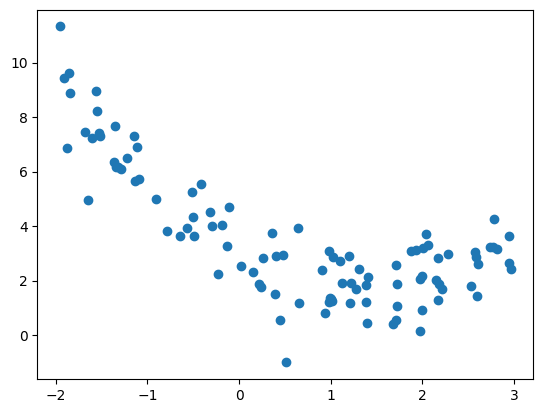

In [15]:
m = 100
x1 = 5 * np.random.rand(m, 1) - 2
x2 = 0.7 * x1 ** 2 - 2 * x1 + 3 + np.random.randn(m, 1)

plt.scatter(x1, x2)
plt.show()

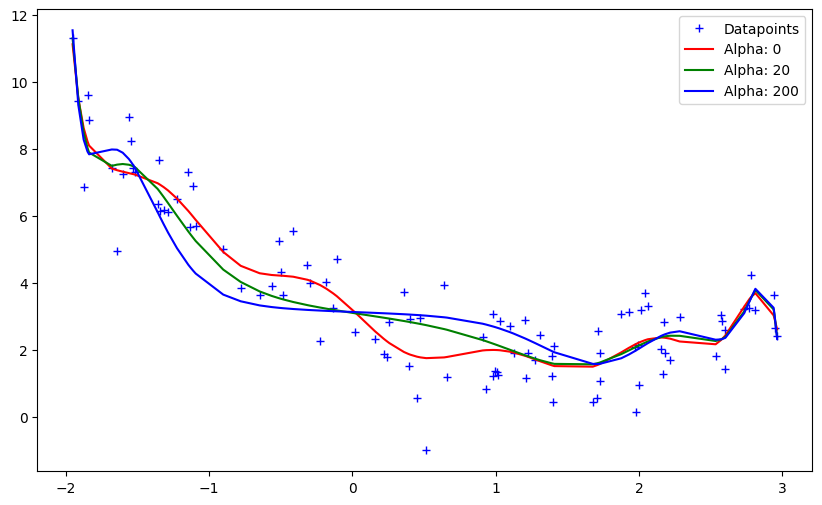

In [16]:
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import PolynomialFeatures

def get_preds_ridge(x1, x2, alpha):
    model = Pipeline([
        ('poly_feats', PolynomialFeatures(degree=16)),
        ('ridge', Ridge(alpha=alpha))
    ])
    model.fit(x1, x2)
    return model.predict(x1)

alphas = [0, 20, 200]
cs = ['r', 'g', 'b']

plt.figure(figsize=(10, 6))
plt.plot(x1, x2, 'b+', label='Datapoints')

for alpha, c in zip(alphas, cs):
    preds = get_preds_ridge(x1, x2, alpha)
    # Plot
    plt.plot(sorted(x1[:, 0]), preds[np.argsort(x1[:, 0])], c, label='Alpha: {}'.format(alpha))

plt.legend()
plt.show()

In [ ]:
# lets genrate fake data for regressiin problem

In [17]:
from sklearn.datasets import make_regression
import matplotlib.pyplot as plt
import numpy as np

In [18]:
X,y = make_regression(n_samples=100, n_features=1, n_informative=1, n_targets=1,noise=20,random_state=13)

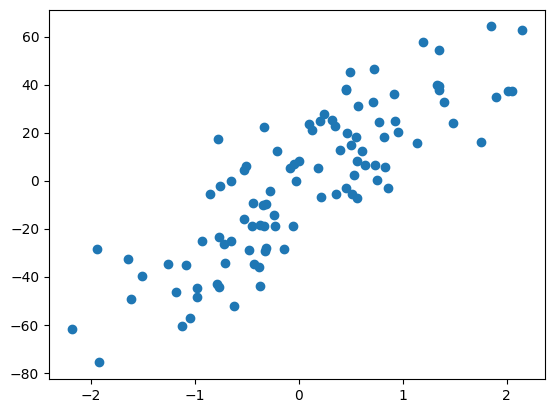

In [19]:
plt.scatter(X,y)

In [20]:
from sklearn.linear_model import LinearRegression
lr = LinearRegression()
lr.fit(X,y)
print(lr.coef_)
print(lr.intercept_)

[27.82809103]
-2.29474455867698


In [21]:
from sklearn.linear_model import Ridge
rr = Ridge(alpha=10)
rr.fit(X,y)
print(rr.coef_)
print(rr.intercept_)



[24.9546267]
-2.1269130035235735


In [22]:
rr1 = Ridge(alpha=100)
rr1.fit(X,y)
print(rr1.coef_)
print(rr1.intercept_)

[12.93442104]
-1.4248441496033308


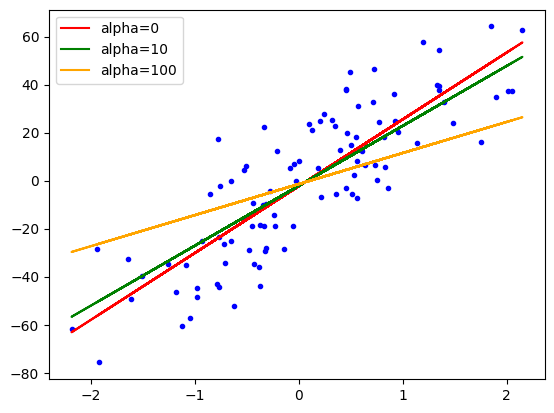

In [23]:
plt.plot(X,y,'b.')
plt.plot(X,lr.predict(X),color='red',label='alpha=0')
plt.plot(X,rr.predict(X),color='green',label='alpha=10')
plt.plot(X,rr1.predict(X),color='orange',label='alpha=100')
plt.legend()

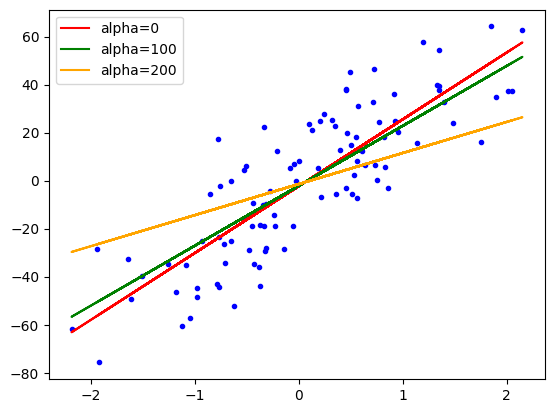

In [24]:
plt.plot(X,y,'b.')
plt.plot(X,lr.predict(X),color='red',label='alpha=0')
plt.plot(X,rr.predict(X),color='green',label='alpha=100')
plt.plot(X,rr1.predict(X),color='orange',label='alpha=200')
plt.legend()

In [25]:
from sklearn.datasets import load_diabetes
from sklearn.metrics import r2_score
import numpy as np

In [26]:
X,y = load_diabetes(return_X_y=True)
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.2,random_state=4)


In [27]:
from sklearn.linear_model import SGDRegressor
reg = SGDRegressor(penalty='l2',max_iter=500,eta0=0.1,learning_rate='constant',alpha=0.001)

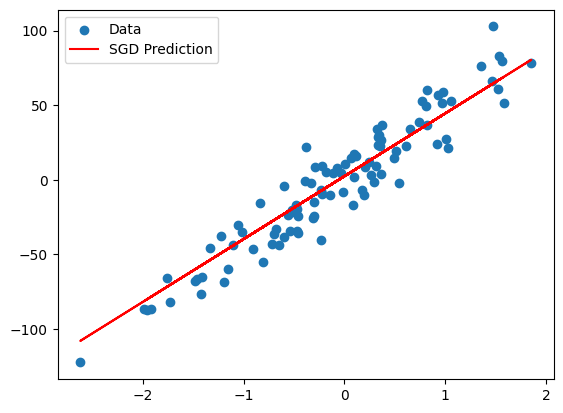

In [28]:
from sklearn.datasets import make_regression
from sklearn.linear_model import SGDRegressor
import matplotlib.pyplot as plt

# Generate sample data
X, y = make_regression(n_samples=100, n_features=1, noise=15, random_state=42)

# Train SGD Regressor with L2 regularization
reg = SGDRegressor(penalty='l2', max_iter=500, eta0=0.1, learning_rate='constant', alpha=0.001)
reg.fit(X, y)

# Predict and plot
y_pred = reg.predict(X)

plt.scatter(X, y, label="Data")
plt.plot(X, y_pred, color='red', label="SGD Prediction")
plt.legend()
plt.show()



#  What is Lasso Regression?
 Lasso Regression (short for Least Absolute Shrinkage and Selection Operator) is a type of linear regression that includes L1 regularization.
## How it Works:
It minimizes the following cost function:
   Cost Function=RSS+λ∑n∣wi∣

RSS: Residual Sum of Squares (normal error from linear regression)

λ (lambda): Regularization strength

|wⱼ|: Absolute value of the regression coefficients

Note: as lambda value increases the more coefficient become zero.
bcz for finding m the value is add in numenator.
# Why Use Lasso Regression?
**Feature Selection:**

Lasso can shrink some coefficients to exactly 0.

This helps in automatically selecting important features, especially useful in high-dimensional data (many features).

**Prevent Overfitting:**

The penalty discourages overly complex models (with large weights).

This helps improve generalization on new data.

Simpler, Interpretable Models:

Since it reduces unimportant feature weights to zero, the final model is easier to interpret.

## When to Use:
When you have many features (more than observations, or a large number).

When you suspect that only a few features are actually important.

When you want to automatically reduce dimensionality.



In [1]:
import numpy as np
from sklearn.linear_model import Lasso
from sklearn.datasets import make_regression
import matplotlib.pyplot as plt

In [2]:
# Generate some sample data (100 samples, 10 features)
X, y = make_regression(n_samples=100, n_features=10, noise=10, random_state=42)


In [3]:
# Apply Lasso Regression
lasso = Lasso(alpha=0.1)  # alpha = regularization strength
lasso.fit(X, y)

Lasso(alpha=0.1)

In [4]:
# Display coefficients
print("Lasso Coefficients:", lasso.coef_)

Lasso Coefficients: [18.33220108 55.22158559  3.7473371  62.90282306 93.14957911 69.91008383
 85.39341954  8.90786448  3.63621505 70.62597169]


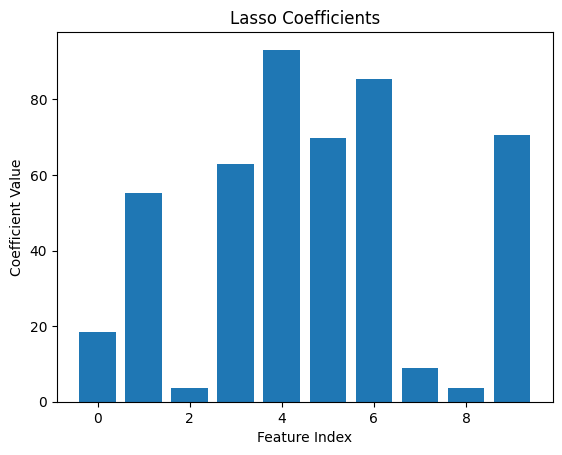

In [5]:
# Plot the coefficients
plt.bar(range(len(lasso.coef_)), lasso.coef_)
plt.title("Lasso Coefficients")
plt.xlabel("Feature Index")
plt.ylabel("Coefficient Value")
plt.show()

Some coefficients may become exactly zero, showing that Lasso eliminates less important features.

Adjusting alpha changes the amount of regularization:

Higher alpha = more shrinkage (more zeros)

Lower alpha = model behaves more like simple Linear Regression

In [6]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression, Ridge, Lasso
from sklearn.datasets import make_regression

In [7]:
# Generate data: 100 samples, 10 features, only 3 informative
X, y = make_regression(n_samples=100, n_features=10, n_informative=3, noise=10, random_state=42)


In [8]:
# Models
linear = LinearRegression()
ridge = Ridge(alpha=1.0)
lasso = Lasso(alpha=0.1)

In [9]:
# Fit models
linear.fit(X, y)
ridge.fit(X, y)
lasso.fit(X, y)

Lasso(alpha=0.1)

In [10]:
# Get coefficients
coef_linear = linear.coef_
coef_ridge = ridge.coef_
coef_lasso = lasso.coef_


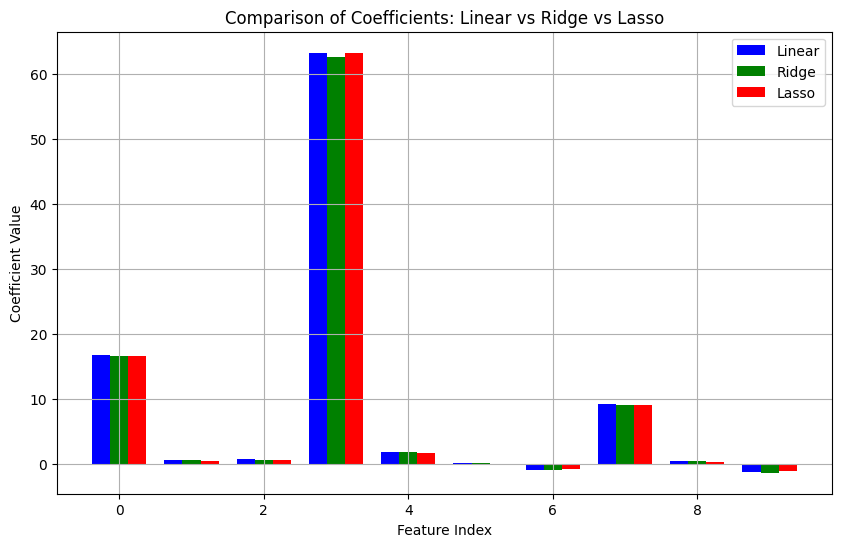

In [11]:
# Plotting
x = np.arange(len(coef_linear))
width = 0.25

plt.figure(figsize=(10, 6))
plt.bar(x - width, coef_linear, width=width, label='Linear', color='blue')
plt.bar(x, coef_ridge, width=width, label='Ridge', color='green')
plt.bar(x + width, coef_lasso, width=width, label='Lasso', color='red')
plt.xlabel("Feature Index")
plt.ylabel("Coefficient Value")
plt.title("Comparison of Coefficients: Linear vs Ridge vs Lasso")
plt.legend()
plt.grid(True)
plt.show()

## What is Elastic Net Regression?
Elastic Net Regression is a linear regression model that combines Lasso (L1) and Ridge (L2) regularization.

It’s useful when:

You have many correlated features, and

You want both feature selection (like Lasso) and coefficient shrinkage (like Ridge)

Formula:
Cost Function=RSS+λ1∑∣wj∣+λ2∑wj2

RSS+α(ρ∑∣wj∣+(1−ρ)∑wj2)
​
α controls the overall regularization strength

ρ (called l1_ratio in scikit-learn) controls the mix between Lasso and Ridge:

ρ = 1: behaves like Lasso

ρ = 0: behaves like Ridge

0 < ρ < 1: Elastic Net
​
 

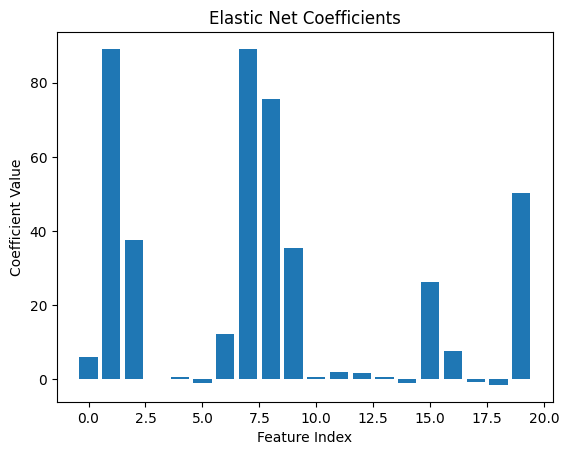

In [12]:
from sklearn.linear_model import ElasticNet
from sklearn.datasets import make_regression
import matplotlib.pyplot as plt

# Generate sample data
X, y = make_regression(n_samples=100, n_features=20, noise=10, random_state=42)

# Fit Elastic Net
model = ElasticNet(alpha=0.1, l1_ratio=0.5)  # 0.5 = mix of Lasso & Ridge
model.fit(X, y)

# Plot coefficients
plt.bar(range(len(model.coef_)), model.coef_)
plt.title("Elastic Net Coefficients")
plt.xlabel("Feature Index")
plt.ylabel("Coefficient Value")
plt.show()


# Elastic Net on California Housing Data

In [1]:
from sklearn.datasets import fetch_california_housing
from sklearn.linear_model import ElasticNetCV
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, r2_score
import numpy as np

In [2]:
# Load dataset
data = fetch_california_housing()
X = data.data
y = data.target

In [3]:
print(data.DESCR)

.. _california_housing_dataset:

California Housing dataset
--------------------------

**Data Set Characteristics:**

:Number of Instances: 20640

:Number of Attributes: 8 numeric, predictive attributes and the target

:Attribute Information:
    - MedInc        median income in block group
    - HouseAge      median house age in block group
    - AveRooms      average number of rooms per household
    - AveBedrms     average number of bedrooms per household
    - Population    block group population
    - AveOccup      average number of household members
    - Latitude      block group latitude
    - Longitude     block group longitude

:Missing Attribute Values: None

This dataset was obtained from the StatLib repository.
https://www.dcc.fc.up.pt/~ltorgo/Regression/cal_housing.html

The target variable is the median house value for California districts,
expressed in hundreds of thousands of dollars ($100,000).

This dataset was derived from the 1990 U.S. census, using one row per ce

In [4]:
# Split into train/test
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [5]:
# Train Elastic Net with cross-validation
model = ElasticNetCV(cv=5, random_state=42, l1_ratio=[.1, .5, .7, .9, .95, 1], alphas=np.logspace(-4, 1, 50))
model.fit(X_train, y_train)

ElasticNetCV(alphas=array([1.00000000e-04, 1.26485522e-04, 1.59985872e-04, 2.02358965e-04,
       2.55954792e-04, 3.23745754e-04, 4.09491506e-04, 5.17947468e-04,
       6.55128557e-04, 8.28642773e-04, 1.04811313e-03, 1.32571137e-03,
       1.67683294e-03, 2.12095089e-03, 2.68269580e-03, 3.39322177e-03,
       4.29193426e-03, 5.42867544e-03, 6.86648845e-03, 8.68511374e-03,
       1.09854114e-02, 1.389495...
       7.19685673e-02, 9.10298178e-02, 1.15139540e-01, 1.45634848e-01,
       1.84206997e-01, 2.32995181e-01, 2.94705170e-01, 3.72759372e-01,
       4.71486636e-01, 5.96362332e-01, 7.54312006e-01, 9.54095476e-01,
       1.20679264e+00, 1.52641797e+00, 1.93069773e+00, 2.44205309e+00,
       3.08884360e+00, 3.90693994e+00, 4.94171336e+00, 6.25055193e+00,
       7.90604321e+00, 1.00000000e+01]),
             cv=5, l1_ratio=[0.1, 0.5, 0.7, 0.9, 0.95, 1], random_state=42)

In [6]:
# Predict
y_pred = model.predict(X_test)

In [8]:
# Evaluation
print("Best alpha:", model.alpha_)
print("Best l1_ratio:", model.l1_ratio_)
print("R² score:", r2_score(y_test, y_pred))
print("RMSE:", np.sqrt(mean_squared_error(y_test, y_pred)))


Best alpha: 0.0006551285568595509
Best l1_ratio: 0.1
R² score: 0.5765191491549193
RMSE: 0.7449383256756824


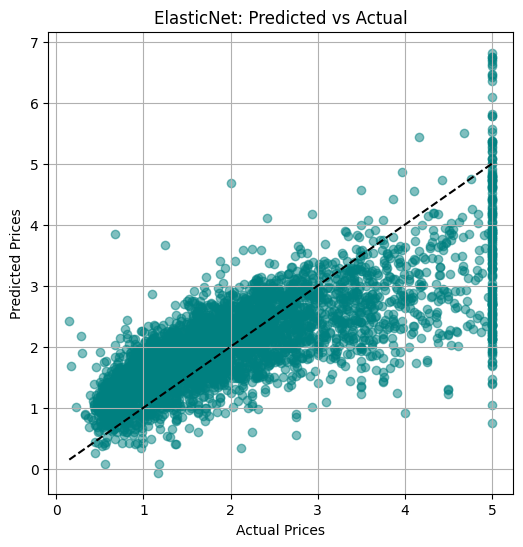

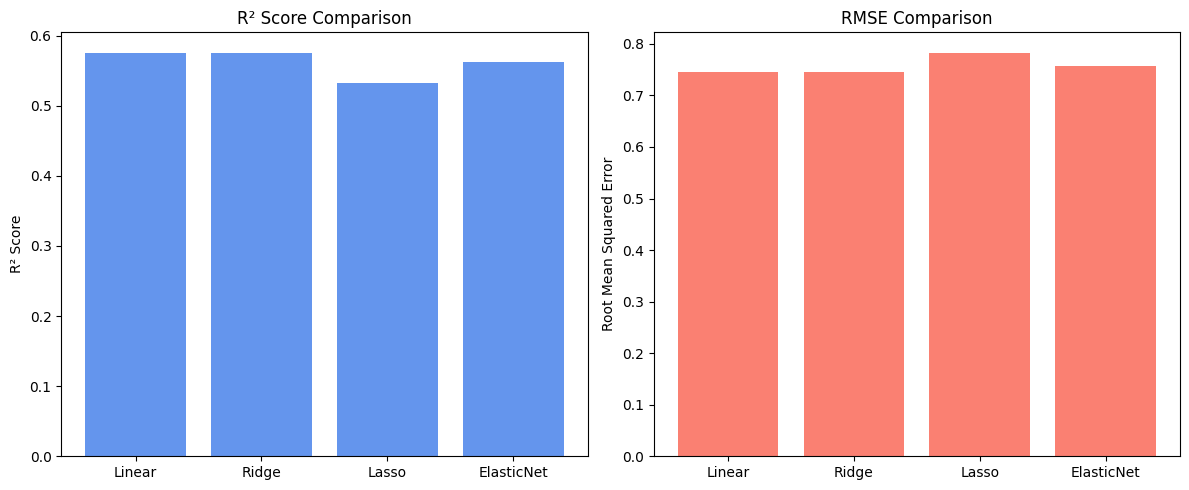

In [9]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import fetch_california_housing
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression, Ridge, Lasso, ElasticNet
from sklearn.metrics import mean_squared_error, r2_score

# Load dataset
data = fetch_california_housing()
X, y = data.data, data.target

# Train/test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Initialize models
models = {
    "Linear": LinearRegression(),
    "Ridge": Ridge(alpha=1.0),
    "Lasso": Lasso(alpha=0.1),
    "ElasticNet": ElasticNet(alpha=0.1, l1_ratio=0.5)
}

results = {}

# Fit and evaluate each model
for name, model in models.items():
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    r2 = r2_score(y_test, y_pred)
    rmse = np.sqrt(mean_squared_error(y_test, y_pred))
    results[name] = (r2, rmse, y_pred)

# 🔹 Plot Predicted vs Actual for ElasticNet
plt.figure(figsize=(6, 6))
plt.scatter(y_test, results["ElasticNet"][2], color='teal', alpha=0.5)
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], '--', color='black')
plt.xlabel("Actual Prices")
plt.ylabel("Predicted Prices")
plt.title("ElasticNet: Predicted vs Actual")
plt.grid(True)
plt.show()

# 🔹 Bar Plot: R² Score and RMSE Comparison
model_names = list(results.keys())
r2_scores = [results[m][0] for m in model_names]
rmses = [results[m][1] for m in model_names]

plt.figure(figsize=(12, 5))

# R² scores
plt.subplot(1, 2, 1)
plt.bar(model_names, r2_scores, color='cornflowerblue')
plt.title("R² Score Comparison")
plt.ylabel("R² Score")

# RMSE
plt.subplot(1, 2, 2)
plt.bar(model_names, rmses, color='salmon')
plt.title("RMSE Comparison")
plt.ylabel("Root Mean Squared Error")

plt.tight_layout()
plt.show()
